<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/comp_neuro_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational neuroscience exercises week 5

```
Students = {s1066862: 'Daphne Cornelisse', s4572408: 'Kyra Evers'}
```

In [ ]:
# @title Dependencies
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy
import numpy as np
import seaborn as sns
cmap = sns.color_palette("light:b", as_cmap=True)
sns.set_style('white')

## Problem 1 

### 1 a)

Let $f_i(x) = \exp(\frac{(x - x_i)^2}{2 \sigma ^2})$ be the tuning function of neuron $i$. Recall that a tuning curve give the mean firing rate of neurons across multiple trials. We are asked to determine the Fisher information based on an estimator $\hat \theta$. 



In [1] the Fisher information for $N$ neurons is defined as

\begin{align*}
J(x) &= \sum_{i = 1}^N \mathbb{E} \left[ - \frac{\partial^2}{\partial x^2} \log \mathbb{P} (r_i | x) \right] \\
     &= \sum_{i = 1}^N \mathbb{E} \left[ - \frac{\partial}{\partial x} \left( \frac{f_i^{'}(x)}{f_i(x)} \right) r_i - f_i^{'}(x) \right] \\
     &= \sum_{i = 1}^N \mathbb{E} \left[ - \frac{f_i^{''}(x)}{f_i^{'}(x)} r_i + \frac{(f_i^{'})^2(x)}{f_i^{2}(x)} r_i + f_i^{''}(x)    \right] \\
     &= \sum_{i = 1}^N \frac{f_i^{'}(x)^2}{f_i(x)}
\end{align*}

Differentiating $f_i$ with respect to $x, \frac{\partial f_i}{\partial x}$ yields

\begin{align*}
f_i^{'}(x) &= - \frac{1}{2 \sigma^2} 2 (x - x_i) \exp \left( \frac{(x - x_i)^2}{2 \sigma ^2} \right) \\
           &= - \frac{(x - x_i)}{\sigma ^2} \exp \left( \frac{(x - x_i)^2}{2 \sigma ^2} \right) \\
           &= - \frac{(x - x_i)}{\sigma ^2} f_i(x)
\end{align*}

Notice that the RHS is just $f_i(x)$. As such, using $\theta_s$ as the preferred stimulus of the neuron, we obtain that the Fisher information is computed as

\begin{align*}
J(\theta_s) &= T \sum_{i = 1}^N \left(  \frac{\theta_s - \theta_i}{\sigma^2}  \right) f_i(\theta_s)
\end{align*}

where $T$ is the measurement interval.

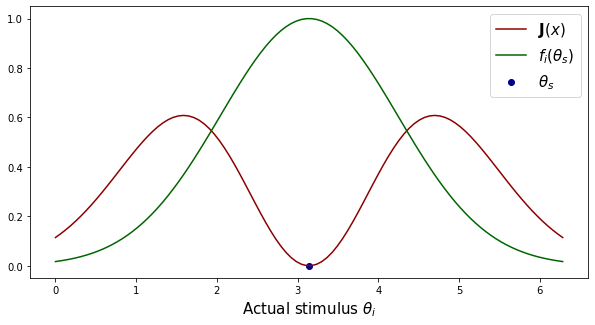

In [ ]:
#@title The Fisher information of a Gaussian tuning curve
theta_i = np.pi
sigma_i = 1.1

theta_s_range = np.linspace(0, 2*np.pi, 100) 
tuning_curve = lambda theta_s, theta_i, sigma_i: np.exp(-((theta_s - theta_i)**2) / (2*(sigma_i**2))) 
der_tuning_curve = lambda theta_s, theta_i, sigma_i: - ((theta_s - theta_i) / (sigma_i**2)) * ( np.exp(- ((theta_s - theta_i)**2) / (2*(sigma_i**2))) )

def Jx(theta_s, theta_i, sigma_i): 
  ''' Compute Fisher information for one neuron
  '''
  result = (der_tuning_curve(theta_s, theta_i, sigma_i)**2) / tuning_curve(theta_s, theta_i, sigma_i)
  if type(theta_s) != float:
    result[isnan(result)] = 0 
  elif isnan(result):
    result = 0 
  return np.array(result)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(theta_s_range, Jx(theta_s_range, theta_i, sigma_i), 'darkred', label =r'$\mathbf{J}(x)$')
ax.plot(theta_s_range, tuning_curve(theta_s_range, theta_i, sigma_i), 'darkgreen', label =r'$f_i(\theta_s)$')
ax.scatter(theta_i, 0, c='darkblue', label=(r'$\theta_s$'))
ax.set_xlabel('Actual stimulus ' + r'$\theta_i$', fontsize=15)
ax.legend(fontsize=15);

The orientation $\theta_s$ that is best estimated best depends the maximum likelihood of the Fisher information (i.e. the peak of the tuning curve). The Fisher information can be estimated best when the actual stimulus is equal to the preferred stimulus $\theta_i = \theta_s$, which is $\theta_i = \pi$ in the figure above.

### 1 b)

We now consider an array of $N$ neuronal cells with tuning functions $f_i \, \forall i = 1, \dots ,N$ for which the preferred stimulus $\theta_s$ is uniformly distributed. From [3] we find the following equation that approximates the sum over neurons by integrating over their preferred stimulus orientations

\begin{align*}
J(x) &\approx \rho_{x} T \int_{-\infty}^{\infty} \frac{(x - \xi)^2}{\sigma_r^4} \cdot \exp \left( \frac{(x - \xi)^2}{2 \sigma_r ^2} \right) d\xi \\
  &= \frac{\rho_x T}{\sigma_r^4} \int_{-\infty}^{\infty} (x - \xi)^2 \cdot \left( \frac{(x - \xi)^2}{2 \sigma_r ^2} \right) d\xi \\
  & \text{taking } u = x - \xi \rightarrow \frac{du}{d\xi} = -1, \text{ and } a = \frac{1}{2 \sigma} \\
  &= \frac{\rho_x T}{\sigma_r^4} \int_{-\infty}^{\infty} u^2 \exp(- a u^2) du \\
  &= \frac{\rho_x T}{\sigma_r^4} \frac{1}{2} \sqrt{\pi \sigma } \\
  &= \frac{\rho_x T \sqrt{2 \pi}}{\sigma_r}
\end{align*}

where $\sigma_r$ is the width of the tuning curve and $\rho_x$ the density with which the neurons cover the range of stimulus values. The resulting expression shows that the Fisher information $J(x)$ is proportional to this number divided by the width of the tuning curve $\sigma_r$. Therefore, there is an inverse relationship between $\sigma_r$ and the Fisher information: narrower tuning curves lead to a higher encoding accuracy.

### 1 c)

The Fisher information is highest when neurons have a narrow tuning curve, but the width of this tuning curve needs to be large enough to cover the stimulus space $\theta_s$.

The $\frac{1}{\sigma_r^4}$ term decreases

The $\frac{1}{\exp(1/\sigma_r^2)}$ converges to 1

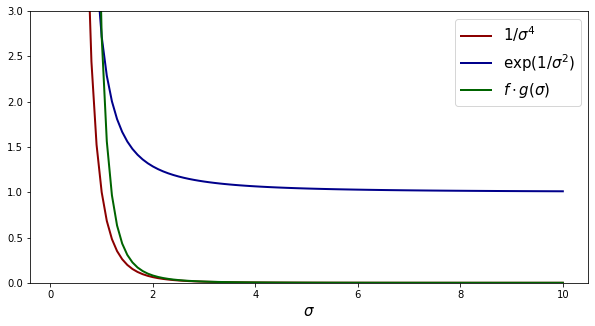

In [ ]:
#@title Optimal width when N is constant
f = lambda x: 1/(x**4)
g = lambda x: np.exp((1/x**2))
fg = lambda x: 1/(x**4) * np.exp((1/x**2))

x = np.linspace(0.1, 10, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_ylim([0, 3])
ax.plot(x, f(x), 'darkred', label=r'$1/\sigma^4$', lw=2)
ax.plot(x, g(x), 'darkblue', label=r'$\exp(1/\sigma^2)$', lw=2)
ax.plot(x, fg(x), 'darkgreen', label=r'$f \cdot g(\sigma)$', lw=2)
ax.set_xlabel(r'$\sigma$', fontsize=15)
ax.legend(fontsize=15);

### 1 d) 

We are asked to derive the maximum likelihood (ML) of the stimulus orientation for the given neural population. Under the Poisson encoding model we implicitly assume that the neural firing rates $r_i(t)$ are independent.

The MLE maximises the conditional probability density of the stimulus, that is, it gives the stimulus $\mathbf{x}$ which maximises the likelihood $\mathbb{P}(\mathbf{r} | \mathbf{x})$. Formally the ML is defined as

\begin{align*}
\hat{\mathbf{x}} &= \underset{\mathbf{x}}{\text{arg max}} \, \mathbb{P}(\mathbf{r}|\mathbf{x}) \\
  &= \underset{\mathbf{x}}{\text{arg max}} \, \ln ( \mathbb{P}(\mathbf{r}|\mathbf{x}, x))
\end{align*}

here, we use that $x_i$ is the observed stimulus orientation and $x$ the preferred stimulus orientation for neuron $n$.

As the firing rate $r_i$ is i.i.d, the density of all observations is the product of the independent observations. We use that $r_i$ is only depends on $x_i$, not on all of $\bf{x}$:

\begin{align*}
  &= \underset{\mathbf{x}}{\text{arg max}} \, \ln \left( \prod_{i=1}^N \mathbb{P}( r_i |x_i, x) \right) \\
  &= \underset{\mathbf{x}}{\text{arg max}} \,  \sum_{i=1}^N \ln \left( \mathbb{P}( r_i |x_i, x) \right)
\end{align*}

Taking the derivative w.r.t $x$ and by setting the derivative equal to zero, we obtain

\begin{align*}
 0 &= \frac{\partial \ln p(\mathbf{r}|x)}{\partial x} \\
 &= \sum_{i=1}^N \frac{\partial \ln p(r_i|x)}{\partial x} \\
 &= \sum_{i=1}^N \left[ \frac{f_i^{'}(x_i)}{f_i(x)} r_i - f_i^{'}(x)  \right] \\
 &= \sum_{i=1}^N \left[ - \frac{(x - x_i)}{\sigma^2} r_i + \frac{(x - x_i)}{\sigma ^2} f_i(x) \right] \\
 &= \sum_{i=1}^N \left[ \frac{(x - x_i)}{\sigma^2} (f_i(x) - r_i) \right]
\end{align*} 
For sufficiently dense neuron distributions, that is, for large $\sigma^2$, we have
\begin{align}
0 &= \sum_{i=1}^N \left[ \frac{(x - x_i)}{\sigma^2} -r_i \right],
\end{align}
and hence we obtain
\begin{align*}
\hat{\mathbf{x}}_{\text{ML}} = \frac{\sum_{i=1}^{N}r_{i}x_{i}}{\sum_{i=1}^{N}r_{i}}.
\end{align*}

### 1 e)


### 1 f)

## Problem 2 

We have two neurons with a normally distributed firing rates denoted by $r_{i}$ for $i \in \{1, 2\}$. The vector of firing rates is called $\mathbf{r} = \begin{pmatrix}r_{1} \\ r_{2}\end{pmatrix}$.

We assume the firing rates have mean activity that is linear in an exogeneous variable $\mathbf{x}$ with an additive error term that follows a univariate normal distribution for each of the neurons, that is,
$$r_{i} = x + \eta_{i}, \qquad \forall i \in \{1, 2\}$$

where $\eta_{i} \sim \mathcal{N}(0, \sigma^{2})$. Hence, the response rate $\mathbf{r}$ given a stimulus $\mathbf{x}$ follows the following bivariate normal distribution:
\begin{align*}
  \mathbb{P}(\mathbf{r}\,|\,\mathbf{x}) &= (2\pi)^{-2}\text{det}\left(\mathbf{Q}\right)^{-1}\exp\left(-\frac{1}{2}(\mathbf{r} - f(\mathbf{x}))^{T}\mathbf{Q}^{-1}(\mathbf{r}-f(\mathbf{x}))\right) \\
  &= (2\pi)^{-2}\text{det}\left(\mathbf{Q}\right)^{-1}\exp\left(-\frac{1}{2}(\mathbf{r} - \mathbf{x})^{T}\mathbf{Q}^{-1}(\mathbf{r}-\mathbf{x})\right),
\end{align*}
where the covariance matrix is:
$$\mathbf{Q} = \begin{bmatrix}
  \sigma^{2} & \rho\sigma^{2} \\
  \rho\sigma^{2} & \sigma^{2}
\end{bmatrix}.$$
Here, we obtain
\begin{align*}
  \mathbb{P}(\mathbf{r}\,|\,\mathbf{x}) &= (2\pi)^{-2}\begin{vmatrix}
  \sigma^{2} & \rho\sigma^{2} \\
  \rho\sigma^{2} & \sigma^{2}
\end{vmatrix}^{-1}\exp\left(-\frac{1}{2}(\mathbf{r} - \mathbf{x})^{T}\begin{bmatrix}
  \sigma^{2} & \rho\sigma^{2} \\
  \rho\sigma^{2} & \sigma^{2}
\end{bmatrix}^{-1}(\mathbf{r}-\mathbf{x})\right).
\end{align*}
The Fisher Information is defined as [2]
\begin{align*}
J(\mathbf{x}) &= f'(\mathbf{x}) \mathbf{Q}(\mathbf{x})^{-1} f'(\mathbf{x}) + \frac{1}{2} \text{tr} \left[ \mathbf{Q}'(x) \mathbf{Q}^{-1}(x)\mathbf{Q}'(x)\mathbf{Q}^{-1}(x) \right] \\
  &= \mathbf{I} \mathbf{Q}^{-1} \mathbf{I}  + 0 \\
  &= \mathbf{Q}^{-1} \\
  &= \begin{bmatrix} \sigma^2 & \rho \sigma^2 \\  \rho \sigma^2 & \sigma^2  \end{bmatrix} \\
  &= \frac{\sigma^2}{1 - \rho^2} \begin{bmatrix} 1 & - \rho \\ - \rho & 1 \end{bmatrix}
\end{align*}

From here, we can fill in $\rho \in \{ -1, 0, 1 \}$ 

### Case 1: uncorrelated noise ($\rho = 0$)

We fill in $\rho = 0$ and obtain:

\begin{align*}
J(x) &= \sigma^2 \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix} 
\end{align*}

There is no correlation between the neurons which means that if we observe one neuron, we do not obtain additional information about the other neuron. This is illustrated in the figure below where we have plotted the bivariate normal distribution with zero correlation. The distribution is symmetrical and the width of the contours is equal in all cases.





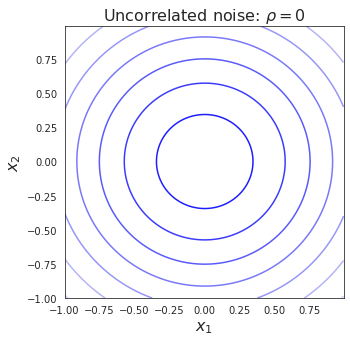

In [ ]:
#@title bivariate normal distribution
A = np.array([[1, 0], [0, 1]])
Px = lambda x: np.exp(-(1/2) * np.inner(np.inner(x, A), x)) 
Ainv = scipy.linalg.inv(A)
Px_rv = scipy.stats.multivariate_normal(mean=None, cov=Ainv)

x1, x2 = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1; pos[:, :, 1] = x2

fig, ax = plt.subplots(1,1, figsize = (5, 5))
ax.set_title(r'Uncorrelated noise: $\rho=0$', fontsize=16)
ax.contour(x1, x2, Px_rv.pdf(pos), cmap=cmap);
ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16);

### Case 2: anticorrelated noise ($\rho \rightarrow -1$) 

Taking the limit as $\rho \rightarrow -1$ results in 

\begin{align*}
  J(x) &= \frac{\sigma^2}{1 - \rho^2} \begin{bmatrix} 1 & - \rho \\ - \rho & 1 \end{bmatrix} \to \begin{bmatrix} \infty & \infty \\ \infty & \infty  \end{bmatrix}
\end{align*}

As we are dividing by the variance there is no randomness left. This means that when we know the firing rate of one neuron we also know the exact firing rate of the other neuron. In case of the bivariate normal distribution, we obtain a distribution that lies on a 45 degrees line that goes through the origin. 


### Case 3: positively correlated noise ($\rho \rightarrow 1$)

Taking the limit as $\rho \rightarrow 1$ results in 

\begin{align*}
  J(x) &= \frac{\sigma^2}{1 - \rho^2} \begin{bmatrix} 1 & - \rho \\ - \rho & 1 \end{bmatrix} \to \begin{bmatrix} \infty & -\infty \\ - \infty & \infty  \end{bmatrix}
\end{align*}

As we are dividing by the variance there is no randomness left. This means that when we know the firing rate of one neuron we also know the exact firing rate of the other neuron. In case of the bivariate normal distribution, we obtain a distribution that lies on a 135 degrees line that goes through the origin. 

## Sources

[1] Computational Neuroscience notes Dr. van Gielen, Section 4.2; page 63.
 
[2] Computational Neuroscience notes Dr. van Gielen, Section 5.2; page 70.

[3] Dayan and Abbot, *Theoretical Neuroscience*, Section 3.3; page 111 (eq. 3.47)
